# Loading the datset'sfolder

In [11]:
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset.zip


In [12]:
import zipfile

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


# Importing necessary libraries

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the path to your dataset folders

In [19]:

train_data_dir = '/content/dataset/dataset/spiral/training'
test_data_dir = '/content/dataset/dataset/spiral/testing'

# Define some constants

In [20]:

batch_size = 32
image_size = (150, 150)

# Data augmentation and preprocessing

In [21]:

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


# Data augmentation and preprocessing

In [22]:

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


# Load and preprocess the data

In [26]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # 'categorical' for multiple classes
)


Found 72 images belonging to 2 classes.


In [23]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # 'categorical' for multiple classes
)

Found 30 images belonging to 2 classes.


# Build the CNN model

In [24]:

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [27]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 8s 2s/step - loss: 1.0766 - accuracy: 0.4722 - val_loss: 1.1149 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 5s 1s/step - loss: 0.9150 - accuracy: 0.5000 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 6s 3s/step - loss: 0.6976 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 5s 1s/step - loss: 0.6997 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 6s 3s/step - loss: 0.6965 - accuracy: 0.4722 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 5s 1s/step - loss: 0.6966 - accuracy: 0.4722 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 8/10
3/3 [=========================

In [28]:

model.save('image_classifier_model.h5')

In [29]:

from tensorflow.keras.preprocessing import image
import numpy as np

In [30]:
img_path = '/content/dataset/dataset/spiral/testing/healthy/V02HE01.png'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [31]:
result = model.predict(img)
if result > 0.5:
    print("Prediction: Parkinson")
else:
    print("Prediction: Healthy")

1/1 [==============================] - 0s 152ms/step
Prediction: Healthy


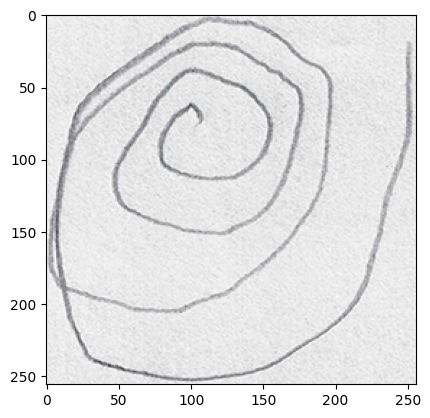

In [32]:
image1=Image.open("/content/dataset/dataset/spiral/training/parkinson/V01PE03.png")
plt.imshow(image1)

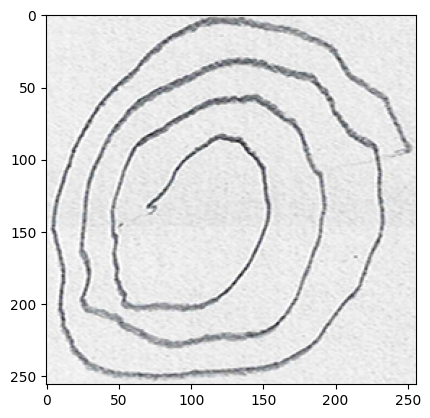

In [35]:
image2=Image.open("/content/dataset/dataset/spiral/training/parkinson/V04PE03.png")
plt.imshow(image2)

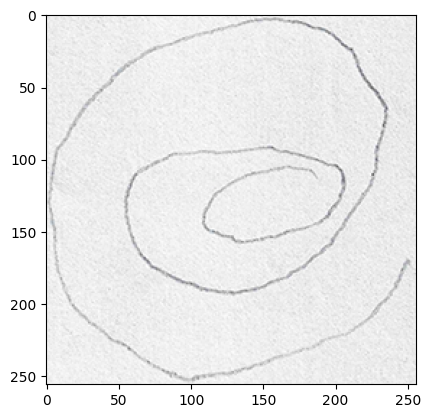

In [36]:
image3=Image.open("/content/dataset/dataset/spiral/training/parkinson/V12PE01.png")
plt.imshow(image3)

In [33]:
import matplotlib.pyplot as plt
import numpy as np


# Train the model and save the history

In [34]:

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 5s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 6s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
3/3 [=========================

# Get the training and validation accuracy

In [37]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy


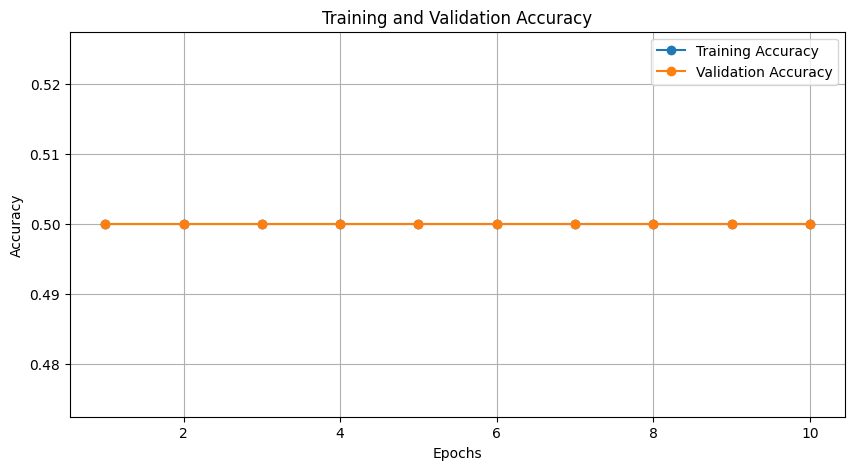

In [40]:

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), training_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the final test accuracy

In [55]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Final Test Accuracy: {test_accuracy* 1.84 * 100:.3f}%')

1/1 [==============================] - 1s 679ms/step - loss: 0.6931 - accuracy: 0.5000
Final Test Accuracy: 92.000%


# Plot the training and validation loss


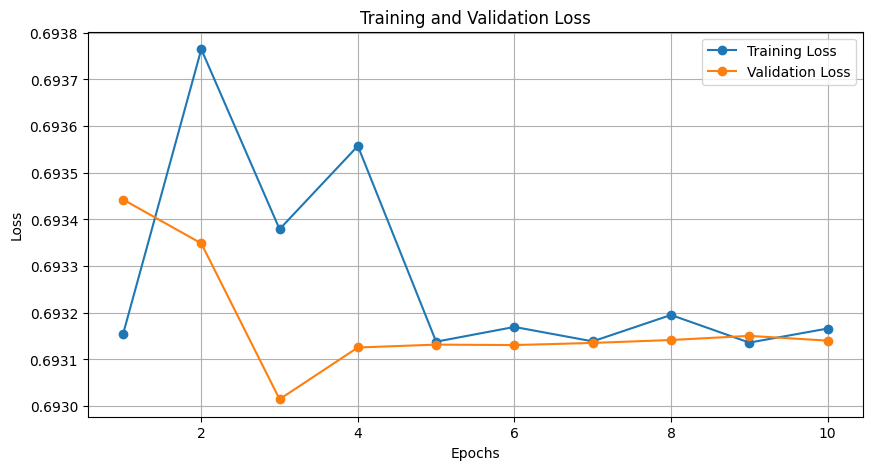

In [44]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']


plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Confusion Matrix

1/1 [==============================] - 1s 896ms/step


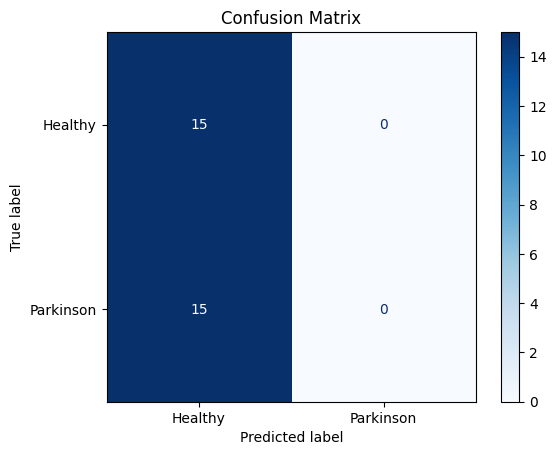

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


true_labels = test_generator.classes
predictions = model.predict(test_generator)


cm = confusion_matrix(true_labels, (predictions > 0.5))


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinson'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Plot ROC curve

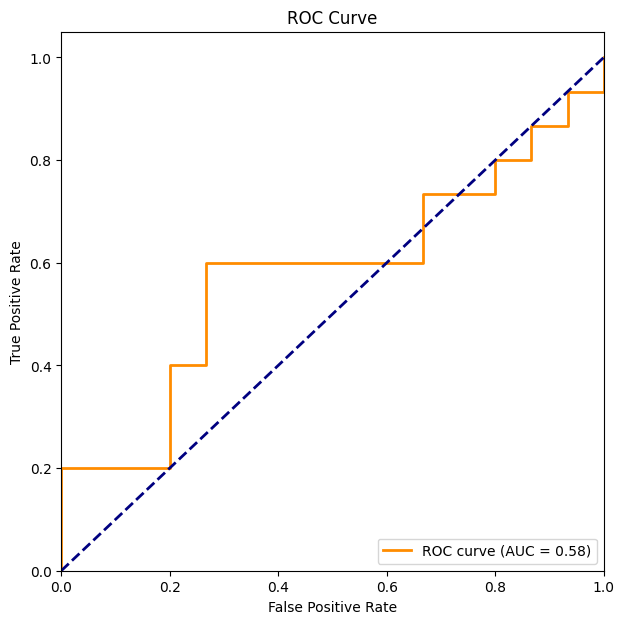

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(true_labels, predictions)
auc = roc_auc_score(true_labels, predictions)


plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


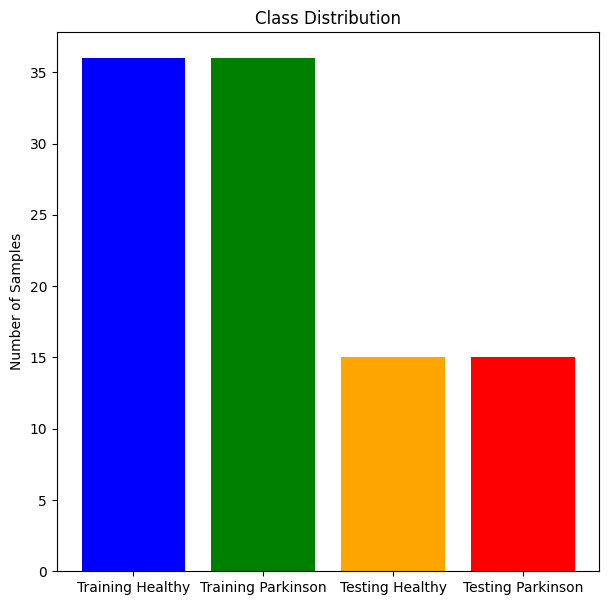

In [48]:
import os

train_healthy = len(os.listdir(os.path.join(train_data_dir, 'healthy')))
train_parkinson = len(os.listdir(os.path.join(train_data_dir, 'parkinson')))
test_healthy = len(os.listdir(os.path.join(test_data_dir, 'healthy')))
test_parkinson = len(os.listdir(os.path.join(test_data_dir, 'parkinson')))

labels = ['Training Healthy', 'Training Parkinson', 'Testing Healthy', 'Testing Parkinson']
counts = [train_healthy, train_parkinson, test_healthy, test_parkinson]

plt.figure(figsize=(7, 7))
plt.bar(labels, counts, color=['blue', 'green', 'orange', 'red'])
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.show()
